In [1]:
import pymongo
import datetime
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats
from collections import Counter
from sklearn import cluster

ModuleNotFoundError: No module named 'pymongo'

# Importing and cleaning our datasets

In [2]:
referendum_df = pd.read_csv("data/EU-referendum-result-data.csv")
referendum_df.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [3]:
immigration_df = pd.read_csv("data/ukmye2015/MYEB3_summary_components_of_change_series_UK_(0215).csv", thousands=',')
immigration_df

,lad2014_code,lad2014_name,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,deaths_2015,natchange_2015,internal_in_2054,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,1102,-81,2137,2281,-144,248,135,113,15,92493
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,1488,465,6184,7071,-887,1250,450,800,12,139509
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,1549,-80,4214,4019,195,202,109,93,25,135275
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,1874,487,6442,6659,-217,994,557,437,-23,194803
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,1135,99,3743,3779,-36,347,407,-60,19,105389
5,E06000006,Halton,E,118559,1389,1230,159,3253,3678,-425,...,1240,302,3470,3646,-176,249,217,32,16,126528
6,E06000007,Warrington,E,191202,2149,1836,313,6517,6412,105,...,2000,350,7127,6650,477,1175,722,453,-13,207695
7,E06000008,Blackburn with Darwen,E,138453,2126,1383,743,4792,5665,-873,...,1277,882,4754,5631,-877,778,673,105,-7,146846
8,E06000009,Blackpool,E,142270,1417,2135,-718,9023,8333,690,...,1954,-176,7480,8241,-761,565,561,4,10,139578
9,E06000010,"Kingston upon Hull, City of",E,249913,2814,2584,230,9009,10690,-1681,...,2628,873,8715,9815,-1100,2718,1467,1251,261,258995


In [4]:
# Let's have a look at the data types in our datasets:
referendum_df.dtypes

# It seems that all the values within the vote columns have been imported as int64 or float64, which might come in handy later 
# on when performing calculations with them.

id                           int64
Region_Code                 object
Region                      object
Area_Code                   object
Area                        object
Electorate                   int64
ExpectedBallots              int64
VerifiedBallotPapers         int64
Pct_Turnout                float64
Votes_Cast                   int64
Valid_Votes                  int64
Remain                       int64
Leave                        int64
Rejected_Ballots             int64
No_official_mark             int64
Voting_for_both_answers      int64
Writing_or_mark              int64
Unmarked_or_void             int64
Pct_Remain                 float64
Pct_Leave                  float64
Pct_Rejected               float64
dtype: object

The referendum dataset was previously explored in the 'c8666430_TMA02_Question2b' notebook attached to the TMA02 by myself, so I do not think there is any need for a further explanation. Let's focus on the new dataset to explore, the immigration_df DataFrame:

In [5]:
immigration_df.dtypes


# However, when looking at columns within the immigration_df that should have been imported as int64, we observe that some
# of them (the ones corresponding to 2015) have been parsed as objects. Let's investigate why this happened

lad2014_code              object
lad2014_name              object
country                   object
population_2001            int64
births_2002                int64
deaths_2002                int64
natchange_2002             int64
internal_in_2002           int64
internal_out_2002          int64
internal_net_2002          int64
international_in_2002      int64
international_out_2002     int64
international_net_2002     int64
other_change_2002          int64
population_2002            int64
births_2003                int64
deaths_2003                int64
natchange_2003             int64
internal_in_2003           int64
internal_out_2003          int64
internal_net_2003          int64
international_in_2003      int64
international_out_2003     int64
international_net_2003     int64
other_change_2003          int64
population_2003            int64
births_2004                int64
deaths_2004                int64
natchange_2004             int64
internal_in_2004           int64
          

In [6]:
#Let's have a look at the values of one of the 'object' columns:

immigration_df["international_in_2015"].unique()

array(['248', '1250', '202', '994', '347', '249', '1175', '778', '565',
       '2718', '975', '485', '838', '2889', '2369', '7611', '148', '7449',
       '1996', '810', '1764', '2610', '7016', '788', '1750', '2129', '491',
       '3819', '846', '1801', '3129', '4192', '811', '1001', '1570', '927',
       '800', '3565', '2156', '1281', '1153', '2238', '6688', '2892',
       '5348', '421', '2115', '1607', '1436', '996', '2282', '22', '2076',
       '1511', '1841', '530', '1696', '406', '420', '1099', '4796', '769',
       '1199', '995', '201', '111', '376', '100', '185', '573', '200',
       '307', '196', '159', '188', '145', '180', '419', '2553', '286',
       '334', '336', '183', '181', '138', '209', '310', '144', '374',
       '218', '477', '357', '298', '552', '581', '458', '305', '140',
       '883', '2174', '585', '752', '142', '116', '319', '335', '1081',
       '472', '236', '910', '328', '423', '986', '438', '325', '393',
       '259', '648', '760', '521', '875', '457', '765', '

In [7]:
# We observe a strange value close to the end of the list of unique values. There is a cell that contains something like:'    :'.
# This might represent missing data or an error when the data was entered. We should now decide how to deal with this. 
# For now let's have a look at the row containing such error.

columns2015 = [column for column in immigration_df.columns if "2015" in column]
immigration_df.loc[immigration_df["international_in_2015"] == '                  :'][columns2015]

# Ok. It seems to happen that the data for Northern Ireland for 2015 is somehow missing. 
# We will now changed the '                  :' values.

,births_2015,deaths_2015,natchange_2015,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015
326,:,:,:,:,:,:,:,:,:,:
327,:,:,:,:,:,:,:,:,:,:
328,:,:,:,:,:,:,:,:,:,:
329,:,:,:,:,:,:,:,:,:,:
330,:,:,:,:,:,:,:,:,:,:
331,:,:,:,:,:,:,:,:,:,:
332,:,:,:,:,:,:,:,:,:,:
333,:,:,:,:,:,:,:,:,:,:
334,:,:,:,:,:,:,:,:,:,:
335,:,:,:,:,:,:,:,:,:,:


In [8]:
# In order to decide what to do with this data let's first have a look at the impact of the missing data (Let's check how many 
# columns are affected)

def count_errors(row):
    return sum(row == '                  :')

print(immigration_df.apply(count_errors))
print(immigration_df.apply(count_errors).sum())

# So the error value '                  :' seems to affect only to the 2015 columns for the North Ireland rows. The problem is
# that it affects every single Northern Ireland row.

lad2014_code               0
lad2014_name               0
country                    0
population_2001            0
births_2002                0
deaths_2002                0
natchange_2002             0
internal_in_2002           0
internal_out_2002          0
internal_net_2002          0
international_in_2002      0
international_out_2002     0
international_net_2002     0
other_change_2002          0
population_2002            0
births_2003                0
deaths_2003                0
natchange_2003             0
internal_in_2003           0
internal_out_2003          0
internal_net_2003          0
international_in_2003      0
international_out_2003     0
international_net_2003     0
other_change_2003          0
population_2003            0
births_2004                0
deaths_2004                0
natchange_2004             0
internal_in_2004           0
                          ..
internal_in_2013           0
internal_out_2013          0
internal_net_2013          0
international_

In [9]:
# for now we will just declare '                  :' as Null value. Later on we will decide what to do about it.
immigration_df.replace(to_replace='                  :', value=np.nan, inplace=True)

# let's now check if the values have indeed changed:
immigration_df.loc[immigration_df["international_in_2015"].isnull()][columns2015]

,births_2015,deaths_2015,natchange_2015,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I found another error: some numbers were imported with commas to indicate thousands. To fix it I went back to the original import and added the "thousands=','" parameter to the read_csv() method

In [10]:
#Let's now have a look at its columns'
immigration_df.columns

Index(['lad2014_code', 'lad2014_name', 'country', 'population_2001',
       'births_2002', 'deaths_2002', 'natchange_2002', 'internal_in_2002',
       'internal_out_2002', 'internal_net_2002',
       ...
       'deaths_2015', 'natchange_2015', 'internal_in_2054',
       'internal_out_2015', 'internal_net_2015', 'international_in_2015',
       'international_out_2015', 'international_net_2015', 'other_change_2015',
       'population_2015'],
      dtype='object', length=158)

At first sight we observe three clearly different columns - "lad2014_code", "lad2014_name" and "country" - which only appear
once. If we have a look at the "MYEB_information_note" document we learn that "lad2014_code" corresponds to the ONS Geographic code for local authorities as defined at mid-2014; "lad2014_name" is the local district or unitary authority name; and country stands for "E": England, "W": Wales, "S": Scotland and "N": Northern Ireland.

The rest of the columns represent population, birht estimates, death estimates, in and out national and international migratory moves and their net values (difference between in and out) for each year from 2001 to 2015.

From the list of columns above we observe what seems to be a typo within one of the 2014 columns: There is a column named "internal_in_2054" although it obviously should read "internal_in_2014". Let's start by fixing this:

In [11]:
immigration_df.columns = [w.replace("internal_in_2054", "internal_in_2015") for w in immigration_df.columns]
# Let's see if the column name has been changed:
immigration_df.columns

Index(['lad2014_code', 'lad2014_name', 'country', 'population_2001',
       'births_2002', 'deaths_2002', 'natchange_2002', 'internal_in_2002',
       'internal_out_2002', 'internal_net_2002',
       ...
       'deaths_2015', 'natchange_2015', 'internal_in_2015',
       'internal_out_2015', 'internal_net_2015', 'international_in_2015',
       'international_out_2015', 'international_net_2015', 'other_change_2015',
       'population_2015'],
      dtype='object', length=158)

We can now see that the column reads "internal_in_2014".

Now, let's rename some columns so the names are more friendly to work with:

In [12]:
immigration_df = immigration_df.rename(columns = {'lad2014_code':'Area_Code', 'lad2014_name':'Area'})
immigration_df

,Area_Code,Area,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,deaths_2015,natchange_2015,internal_in_2015,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,1102,-81,2137,2281,-144,248,135,113,15,92493
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,1488,465,6184,7071,-887,1250,450,800,12,139509
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,1549,-80,4214,4019,195,202,109,93,25,135275
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,1874,487,6442,6659,-217,994,557,437,-23,194803
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,1135,99,3743,3779,-36,347,407,-60,19,105389
5,E06000006,Halton,E,118559,1389,1230,159,3253,3678,-425,...,1240,302,3470,3646,-176,249,217,32,16,126528
6,E06000007,Warrington,E,191202,2149,1836,313,6517,6412,105,...,2000,350,7127,6650,477,1175,722,453,-13,207695
7,E06000008,Blackburn with Darwen,E,138453,2126,1383,743,4792,5665,-873,...,1277,882,4754,5631,-877,778,673,105,-7,146846
8,E06000009,Blackpool,E,142270,1417,2135,-718,9023,8333,690,...,1954,-176,7480,8241,-761,565,561,4,10,139578
9,E06000010,"Kingston upon Hull, City of",E,249913,2814,2584,230,9009,10690,-1681,...,2628,873,8715,9815,-1100,2718,1467,1251,261,258995


In [13]:
# Here I am going to try to calculate the international in total for the international migrations for the whole dataframe. 
# Since some data from 2015 presents missing data we will ignore it for now. We will limit our study to the years 2001 - 2014. 
# We will first create a variable to hold the columns that we are intersted in, which are the international_in_year:
international_in_columns = [column for column in immigration_df if "international_in" in column]
international_in_columns

['international_in_2002',
 'international_in_2003',
 'international_in_2004',
 'international_in_2005',
 'international_in_2006',
 'international_in_2007',
 'international_in_2008',
 'international_in_2009',
 'international_in_2010',
 'international_in_2011',
 'international_in_2012',
 'international_in_2013',
 'international_in_2014',
 'international_in_2015']

In [14]:
# We won't use the last item of the list: "international_in_2015" for the reasons stated above. Let's eliminate it:
international_in_columns.remove("international_in_2015")
international_in_columns

['international_in_2002',
 'international_in_2003',
 'international_in_2004',
 'international_in_2005',
 'international_in_2006',
 'international_in_2007',
 'international_in_2008',
 'international_in_2009',
 'international_in_2010',
 'international_in_2011',
 'international_in_2012',
 'international_in_2013',
 'international_in_2014']

In [15]:
# Let's now create a function that adds all the international_in_year values and assigns their results to a new column
# called international_in_total
def sum_international_in(row):
    return row[international_in_columns].sum()
immigration_df["international_in_total"] = immigration_df.apply(sum_international_in, axis=1)
immigration_df["international_in_total"]
# We can see now our new column holding data for the international_net total added from 2002 to 2014

0       2524
1      15883
2       3501
3       9454
4       4671
5       2596
6      11838
7      10904
8       9475
9      37535
10     13580
11      6719
12      9772
13     33103
14     30913
15     79161
16      2246
17     88528
18     15998
19      9642
20     20737
21     29663
22     87901
23     10137
24     17080
25     30010
26      7222
27     38592
28      9795
29     23551
       ...  
361     8005
362     5459
363     1006
364     3311
365     7203
366    11549
367     2097
368     9272
369     1768
370    10408
371     4116
372     2969
373     4361
374     9767
375     7763
376     5061
377     6697
378    22668
379     1979
380     3529
381     3915
382    61986
383    10083
384     1951
385     1112
386     1163
387     2239
388    10689
389     3976
390     2114
Name: international_in_total, dtype: int64

In [16]:
immigration_df[["Area","international_in_total"]]

,Area,international_in_total
0,Hartlepool,2524
1,Middlesbrough,15883
2,Redcar and Cleveland,3501
3,Stockton-on-Tees,9454
4,Darlington,4671
5,Halton,2596
6,Warrington,11838
7,Blackburn with Darwen,10904
8,Blackpool,9475
9,"Kingston upon Hull, City of",37535


# Different rows
Let's here have a look at the datasets looking for rows that might appear **only** in one of them

In [17]:
# First, let's extract the set of values for the columns "Area_Code" for both datasets.
referendum_codes = referendum_df["Area_Code"].unique()
set_referendum_codes = set(referendum_codes.flatten())
set_referendum_codes

{'E06000001',
 'E06000002',
 'E06000003',
 'E06000004',
 'E06000005',
 'E06000006',
 'E06000007',
 'E06000008',
 'E06000009',
 'E06000010',
 'E06000011',
 'E06000012',
 'E06000013',
 'E06000014',
 'E06000015',
 'E06000016',
 'E06000017',
 'E06000018',
 'E06000019',
 'E06000020',
 'E06000021',
 'E06000022',
 'E06000023',
 'E06000024',
 'E06000025',
 'E06000026',
 'E06000027',
 'E06000028',
 'E06000029',
 'E06000030',
 'E06000031',
 'E06000032',
 'E06000033',
 'E06000034',
 'E06000035',
 'E06000036',
 'E06000037',
 'E06000038',
 'E06000039',
 'E06000040',
 'E06000041',
 'E06000042',
 'E06000043',
 'E06000044',
 'E06000045',
 'E06000046',
 'E06000047',
 'E06000049',
 'E06000050',
 'E06000051',
 'E06000052',
 'E06000053',
 'E06000054',
 'E06000055',
 'E06000056',
 'E06000057',
 'E07000004',
 'E07000005',
 'E07000006',
 'E07000007',
 'E07000008',
 'E07000009',
 'E07000010',
 'E07000011',
 'E07000012',
 'E07000026',
 'E07000027',
 'E07000028',
 'E07000029',
 'E07000030',
 'E07000031',
 'E070

In [18]:
immigration_codes = immigration_df["Area_Code"].unique()
set_immigration_codes = set(immigration_codes.flatten())
set_immigration_codes

{'E06000001',
 'E06000002',
 'E06000003',
 'E06000004',
 'E06000005',
 'E06000006',
 'E06000007',
 'E06000008',
 'E06000009',
 'E06000010',
 'E06000011',
 'E06000012',
 'E06000013',
 'E06000014',
 'E06000015',
 'E06000016',
 'E06000017',
 'E06000018',
 'E06000019',
 'E06000020',
 'E06000021',
 'E06000022',
 'E06000023',
 'E06000024',
 'E06000025',
 'E06000026',
 'E06000027',
 'E06000028',
 'E06000029',
 'E06000030',
 'E06000031',
 'E06000032',
 'E06000033',
 'E06000034',
 'E06000035',
 'E06000036',
 'E06000037',
 'E06000038',
 'E06000039',
 'E06000040',
 'E06000041',
 'E06000042',
 'E06000043',
 'E06000044',
 'E06000045',
 'E06000046',
 'E06000047',
 'E06000049',
 'E06000050',
 'E06000051',
 'E06000052',
 'E06000053',
 'E06000054',
 'E06000055',
 'E06000056',
 'E06000057',
 'E07000004',
 'E07000005',
 'E07000006',
 'E07000007',
 'E07000008',
 'E07000009',
 'E07000010',
 'E07000011',
 'E07000012',
 'E07000026',
 'E07000027',
 'E07000028',
 'E07000029',
 'E07000030',
 'E07000031',
 'E070

In [19]:
# Now let's extract the difference of both sets (values that appear only in one of the sets)
set_codes_missing = set_immigration_codes ^ set_referendum_codes
set_codes_missing

{'GI',
 'N09000001',
 'N09000002',
 'N09000003',
 'N09000004',
 'N09000005',
 'N09000006',
 'N09000007',
 'N09000008',
 'N09000009',
 'N09000010',
 'N09000011',
 'N92000002'}

In [20]:
# Let's check to which regions these codes belong
immigration_df[immigration_df["Area_Code"].isin(list(set_codes_missing))][["Area","country"]]

# Codes missing from the referendum_df but appearing in the immigration_df correspond to the areas in Northern Ireland

,Area,country
326,Antrim and Newtownabbey,N
327,Ards and North Down,N
328,"Armagh City, Banbridge and Craigavon",N
329,Belfast,N
330,Causeway Coast and Glens,N
331,Derry City and Strabane,N
332,Fermanagh and Omagh,N
333,Lisburn and Castlereagh,N
334,Mid and East Antrim,N
335,Mid Ulster,N


In [21]:
referendum_df[referendum_df["Area_Code"].isin(list(set_codes_missing))]

# On the other hand, codes missing from the immigration_df but appearing in the referendum_df belong to Gibraltar and 
# Northern Ireland as a whole

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
171,381,N92000002,Northern Ireland,N92000002,Northern Ireland,1260955,790647,790523,62.69,790523,...,440707,349442,374,18,148,1,207,55.78,44.22,0.05
308,382,E12000009,South West,GI,Gibraltar,24119,20172,20172,83.64,20172,...,19322,823,27,0,8,0,19,95.91,4.09,0.13


# Aggregating data from Northern Ireland

So, here we have a problem: while the immigration dataframe has an entry for each region in Northern Ireland, the referendum_df collated all the Northern Ireland information in a single row. To be able to work with both dataframes without loosing information from Northern Ireland we will have to treat its data in a single row within our immigration_df. To do so we will aggregate data from all the Northern Ireland Regions and put it in a new row that will hold the same code as the referendum_df.
With Gibraltar there is nothing we can do. We are missing all the information regarding the referendum result.

In [22]:
# First lest's use a variable to hold only the rows affecting Northern Ireland:

northern_ireland_df = immigration_df[immigration_df["Area_Code"].isin(list(set_codes_missing))]

In [23]:
# Now let's sum the values correspondin to the numeric columns for Northern Ireland
northern_ireland_values = northern_ireland_df[northern_ireland_df.columns[3:]].sum(axis=0)
len(northern_ireland_values)

# We see that the length of the values is smaller than the original set, since we have not included the first three columns.

156

In [24]:
# Here we append the missing values for the new row
new_row = pd.Series(["N92000002", "Northern Ireland", "N"]).append(northern_ireland_values)
new_row.reset_index(drop=True, inplace=True)
new_row = list(new_row)
len(new_row)

# And now we are back to the original length of the columns

159

In [25]:
# To make the work easier we use the list to create a new dataframe to append to the original one:

new_data_frame = pd.DataFrame([new_row],columns=immigration_df.columns)
new_data_frame

,Area_Code,Area,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,natchange_2015,internal_in_2015,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015,international_in_total
0,N92000002,Northern Ireland,N,1688838,21460,14432,7028,46693,45772,921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168493


In [26]:
# And we can now append our newly created DataFrame to the original one

immigration_df = immigration_df.append(new_data_frame, ignore_index=True)
immigration_df

# Here we have a new row that hold the aggregated values for all Northern Ireland.

,Area_Code,Area,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,natchange_2015,internal_in_2015,internal_out_2015,internal_net_2015,international_in_2015,international_out_2015,international_net_2015,other_change_2015,population_2015,international_in_total
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,-81,2137,2281,-144,248,135,113,15,92493,2524
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,465,6184,7071,-887,1250,450,800,12,139509,15883
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,-80,4214,4019,195,202,109,93,25,135275,3501
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,487,6442,6659,-217,994,557,437,-23,194803,9454
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,99,3743,3779,-36,347,407,-60,19,105389,4671
5,E06000006,Halton,E,118559,1389,1230,159,3253,3678,-425,...,302,3470,3646,-176,249,217,32,16,126528,2596
6,E06000007,Warrington,E,191202,2149,1836,313,6517,6412,105,...,350,7127,6650,477,1175,722,453,-13,207695,11838
7,E06000008,Blackburn with Darwen,E,138453,2126,1383,743,4792,5665,-873,...,882,4754,5631,-877,778,673,105,-7,146846,10904
8,E06000009,Blackpool,E,142270,1417,2135,-718,9023,8333,690,...,-176,7480,8241,-761,565,561,4,10,139578,9475
9,E06000010,"Kingston upon Hull, City of",E,249913,2814,2584,230,9009,10690,-1681,...,873,8715,9815,-1100,2718,1467,1251,261,258995,37535


# Merging both DataFrames

In [27]:
immigration_referendum_df = pd.merge(immigration_df,referendum_df, on="Area_Code")
list(immigration_referendum_df.columns)

['Area_Code',
 'Area_x',
 'country',
 'population_2001',
 'births_2002',
 'deaths_2002',
 'natchange_2002',
 'internal_in_2002',
 'internal_out_2002',
 'internal_net_2002',
 'international_in_2002',
 'international_out_2002',
 'international_net_2002',
 'other_change_2002',
 'population_2002',
 'births_2003',
 'deaths_2003',
 'natchange_2003',
 'internal_in_2003',
 'internal_out_2003',
 'internal_net_2003',
 'international_in_2003',
 'international_out_2003',
 'international_net_2003',
 'other_change_2003',
 'population_2003',
 'births_2004',
 'deaths_2004',
 'natchange_2004',
 'internal_in_2004',
 'internal_out_2004',
 'internal_net_2004',
 'international_in_2004',
 'international_out_2004',
 'international_net_2004',
 'other_change_2004',
 'population_2004',
 'births_2005',
 'deaths_2005',
 'natchange_2005',
 'internal_in_2005',
 'internal_out_2005',
 'internal_net_2005',
 'international_in_2005',
 'international_out_2005',
 'international_net_2005',
 'other_change_2005',
 'populatio

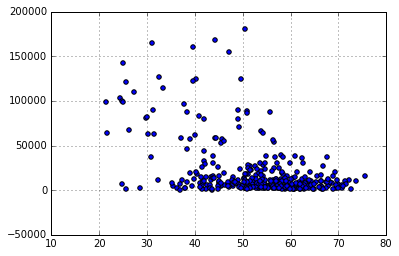

In [28]:
plt.scatter(immigration_referendum_df['Pct_Leave'],
            immigration_referendum_df['international_in_total'])
plt.grid(True)

# Exporting merged dataframe to a new CSV file

In [29]:
immigration_referendum_df.to_csv("data/immigration_referendum_df.csv")

In [30]:
a = pd.read_csv("data/immigration_referendum_df.csv",index_col="Unnamed: 0")
a.head()

,Area_Code,Area_x,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,14029,32071,34,0,12,6,16,30.43,69.57,0.07
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,21181,40177,35,0,16,1,18,34.52,65.48,0.06
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,24586,48128,27,0,6,0,21,33.81,66.19,0.04
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,38433,61982,45,2,13,2,28,38.27,61.73,0.04
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,24172,30994,29,0,0,0,29,43.82,56.18,0.05


# Initial exploration on Pearson's *R*²

In [31]:
immigration_referendum_df[["international_in_total", "Pct_Leave"]].head()

,international_in_total,Pct_Leave
0,2524,69.57
1,15883,65.48
2,3501,66.19
3,9454,61.73
4,4671,56.18


If we want to perform Pearson's *R*² on our data set to see if there is any correlation between percentage of votes towards the leave option and the net number of international immigrantes received in the region for the last decade, we will first have to normalise the data so that both series have a similar range of values.

In [32]:
# First we need to find the max and min values for the international_in_total column:
print(immigration_referendum_df["international_in_total"].min())
print(immigration_referendum_df["international_in_total"].max())

283.0
180449.0


In [33]:
def normaliseData(x):
    return ((x + 283) / (180166))

def normaliseDf(row):
    return normaliseData(row)

immigration_referendum_df["international_normalised"] = immigration_referendum_df["international_in_total"].apply(normaliseDf)

In [34]:
immigration_referendum_df[["international_normalised","international_in_total" ]]

,international_normalised,international_in_total
0,0.015580,2524
1,0.089728,15883
2,0.021003,3501
3,0.054045,9454
4,0.027497,4671
5,0.015980,2596
6,0.067277,11838
7,0.062093,10904
8,0.054161,9475
9,0.209906,37535


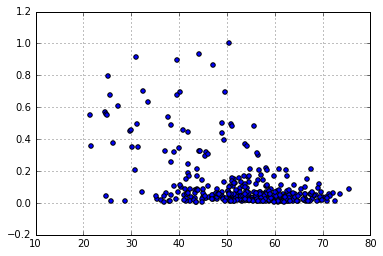

In [35]:
plt.scatter(immigration_referendum_df['Pct_Leave'],
            immigration_referendum_df['international_normalised'])
plt.grid(True)

In [36]:
scipy.stats.pearsonr(immigration_referendum_df['international_normalised'],
            immigration_referendum_df['Pct_Leave'])

(-0.48197796932292258, 1.4761092141475334e-23)

# Finding the relative immigration number over total population

Previously we have been working with absolute immigration population numbers. After some thought it does not seem to be relevant, since the total population for the different areas is not considered. Here I am going to calculate the percentage of immigrant population over the area total population.

In [37]:
immigration_referendum_df[["population_2014", "international_in_total"]]

,population_2014,international_in_total
0,92590,2524
1,139119,15883
2,135042,3501
3,194119,9454
4,105367,4671
5,126354,2596
6,206428,11838
7,146743,10904
8,140501,9475
9,257710,37535


In [38]:
def percentage_immigration(row):
    return (row["international_in_total"] * 100) / row["population_2014"]
immigration_referendum_df["Pct_immigration"] = immigration_referendum_df.apply(percentage_immigration, axis=1)
immigration_referendum_df.sort_values(["Pct_immigration"])

,Area_Code,Area_x,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,international_normalised,Pct_immigration
373,W06000018,Caerphilly,W,169546,1945,1746,199,4785,4162,623,...,52,1,19,3,29,42.37,57.63,0.06,0.012400,1.084244
375,W06000020,Torfaen,W,90912,971,958,13,2188,2403,-215,...,28,0,11,2,15,40.22,59.78,0.06,0.008026,1.269526
334,S12000008,East Ayrshire,S,120310,1135,1457,-322,3220,3207,13,...,26,0,8,0,18,58.60,41.40,0.04,0.010879,1.373127
213,E07000196,South Staffordshire,E,105942,863,1032,-169,4937,4764,173,...,47,0,6,2,39,35.15,64.85,0.07,0.010057,1.381310
209,E07000192,Cannock Chase,E,92165,1048,806,242,3788,3305,483,...,29,0,15,2,12,31.14,68.86,0.05,0.009269,1.407422
368,W06000012,Neath Port Talbot,W,134380,1322,1647,-325,4157,3500,657,...,42,1,17,0,24,43.16,56.84,0.06,0.012555,1.408641
374,W06000019,Blaenau Gwent,W,70000,655,917,-262,1287,1646,-359,...,10,0,3,0,7,37.97,62.03,0.03,0.007743,1.596004
77,E07000038,North East Derbyshire,E,96927,842,1089,-247,4421,4208,213,...,31,0,13,2,16,37.22,62.78,0.05,0.010546,1.627547
267,E08000011,Knowsley,E,151238,1725,1466,259,4963,5608,-645,...,34,4,14,1,15,48.44,51.56,0.05,0.014809,1.629020
215,E07000198,Staffordshire Moorlands,E,94555,829,1027,-198,4087,3598,489,...,33,0,13,0,20,35.27,64.73,0.06,0.010474,1.640703


# Exploration on difference between countries:

In [39]:
immigration_referendum_scotland = immigration_referendum_df[immigration_referendum_df["country"] == "S"]
immigration_referendum_england = immigration_referendum_df[immigration_referendum_df["country"] == "E"]
immigration_referendum_wales = immigration_referendum_df[immigration_referendum_df["country"] == "W"]
immigration_referendum_northern_ireland = immigration_referendum_df[immigration_referendum_df["country"] == "N"]

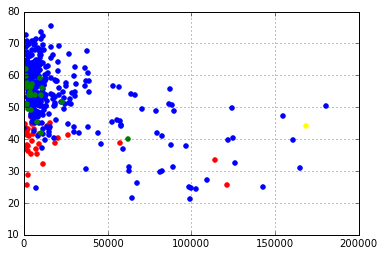

In [40]:


plt.scatter(immigration_referendum_scotland['international_in_total'],
            immigration_referendum_scotland['Pct_Leave'],
            color='red', marker='o', label='cluster 0')
plt.scatter(immigration_referendum_england['international_in_total'],
            immigration_referendum_england['Pct_Leave'],
            color='blue', marker='o', label='cluster 0')
plt.scatter(immigration_referendum_wales['international_in_total'],
            immigration_referendum_wales['Pct_Leave'],
            color='green', marker='o', label='cluster 0')
plt.scatter(immigration_referendum_northern_ireland['international_in_total'],
            immigration_referendum_northern_ireland['Pct_Leave'],
            color='yellow', marker='o', label='cluster 0')
plt.grid(True)

axes = plt.gca()
axes.set_xlim([0,200000])


plt.show()


In [41]:
small_df = immigration_referendum_df[["Area_Code", "Area_x","country","international_in_total",
                                     "Electorate","Pct_Turnout","Pct_Remain", "Pct_Leave","Pct_immigration"]]
small_df.head()

,Area_Code,Area_x,country,international_in_total,Electorate,Pct_Turnout,Pct_Remain,Pct_Leave,Pct_immigration
0,E06000001,Hartlepool,E,2524,70341,65.59,30.43,69.57,2.725996
1,E06000002,Middlesbrough,E,15883,94612,64.89,34.52,65.48,11.416845
2,E06000003,Redcar and Cleveland,E,3501,103529,70.26,33.81,66.19,2.592527
3,E06000004,Stockton-on-Tees,E,9454,141486,71.00,38.27,61.73,4.870208
4,E06000005,Darlington,E,4671,77662,71.07,43.82,56.18,4.433077


In [42]:
small_df.pivot_table(index="country", aggfunc=np.max)

,Area_Code,Area_x,Electorate,Pct_Leave,Pct_Remain,Pct_Turnout,Pct_immigration,international_in_total
country,,,,,,,,
E,E09000033,York,707293,75.56,78.62,83.57,88.069871,180449
N,N92000002,Northern Ireland,1260955,44.22,55.78,62.69,9.154751,168493
S,S12000046,West Lothian,449806,49.87,74.44,76.13,24.991700,121513
W,W06000024,Wrexham,243689,62.03,60.02,77.74,17.495639,61986


In [43]:
small_df[small_df["country"] == "N"]

,Area_Code,Area_x,country,international_in_total,Electorate,Pct_Turnout,Pct_Remain,Pct_Leave,Pct_immigration
380,N92000002,Northern Ireland,N,168493,1260955,62.69,55.78,44.22,9.154751
